# 1. SMILES (Simplified Molecular Input Line Entry System)
SMILES stands for Simplified Molecular Input Line Entry System

## SMILES basics

| Symbol | Meaning                | Example       | Molecule         |
|--------|------------------------|---------------|------------------|
| `C`    | Carbon                 | `"C"`         | methane          |
| `O`    | Oxygen                 | `"CO"`        | methanol         |
| `=`    | Double bond            | `"C=C"`       | ethene           |
| `#`    | Triple bond            | `"C#N"`       | hydrogen cyanide |
| `()`   | Branching              | `"CC(O)C"`    | isopropanol      |
| `[]`   | Special atoms/charges  | `"[NH4+]"`    | ammonium ion     |
| Digits | Ring closures          | `"C1CCCCC1"`  | cyclohexane      |

## Smiles and RDKit

### Convert SMILES to RDKit Molecule

Type of object: <class 'rdkit.Chem.rdchem.Mol'>


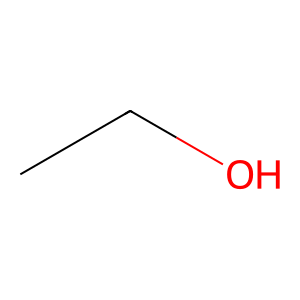

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles("CCO")
print(f"Type of object: {type(mol)}")
Draw.MolToImage(mol)




In [2]:
from rdkit.Chem import Descriptors

molar_mass = Descriptors.MolWt(mol)
print(f"Molar mass of ethanol: {molar_mass:.2f} g/mol")

Molar mass of ethanol: 46.07 g/mol


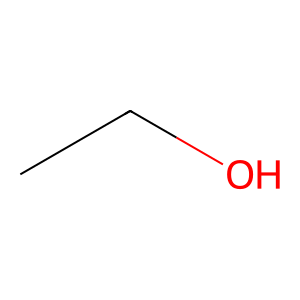

Molar mass: 46.07 g/mol
Type of object: <class 'rdkit.Chem.rdchem.Mol'>


In [3]:
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
from IPython.display import display

mol = Chem.MolFromSmiles("CCO")
img = Draw.MolToImage(mol)

# Display image, even if not last line
display(img)

# Print molar mass and object type
molar_mass = Descriptors.MolWt(mol)
print(f"Molar mass: {molar_mass:.2f} g/mol")
print(f"Type of object: {type(mol)}")


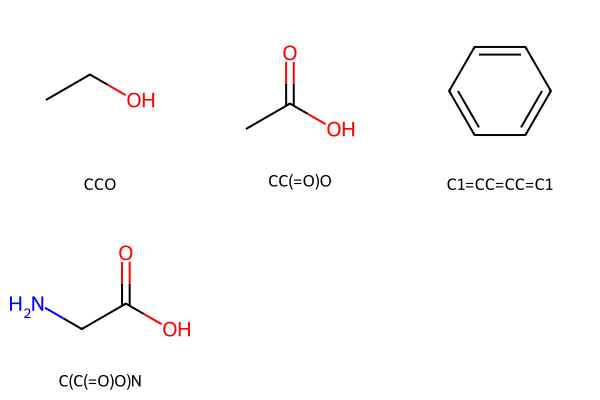

In [4]:
smiles_list = ["CCO", "CC(=O)O", "C1=CC=CC=C1", "C(C(=O)O)N"]
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]
Draw.MolsToGridImage(mols, legends=smiles_list)

### Convert RDKit Molecule to SMILES


In [5]:
mol = Chem.MolFromSmiles("C1CCCCC1")  # cyclohexane
canonical_smiles = Chem.MolToSmiles(mol)
print(f"Canonical SMILES: {canonical_smiles}")

Canonical SMILES: C1CCCCC1


## Canonical SMILES
Caffeine has 4,160 different SMILES string [NextMove](https://nextmovesoftware.com/blog/2014/07/15/how-do-i-write-thee-let-me-count-the-ways/)

In [6]:
mol1 = Chem.MolFromSmiles("CCO")   # ethanol
mol2 = Chem.MolFromSmiles("OCC")   # same molecule, different order

print("Canonical SMILES 1:", Chem.MolToSmiles(mol1))
print("Canonical SMILES 2:", Chem.MolToSmiles(mol2))

Canonical SMILES 1: CCO
Canonical SMILES 2: CCO


### Sterochemistry in SMILES
- `@` or `@@` to represent tetrahedral chirality
- `/` and `\` for cis/trans (E/Z) stereochemistry around double bonds

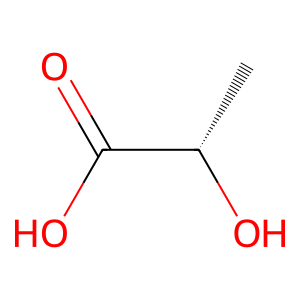

In [7]:
lactic = Chem.MolFromSmiles("C[C@H](O)C(=O)O")
Draw.MolToImage(lactic)

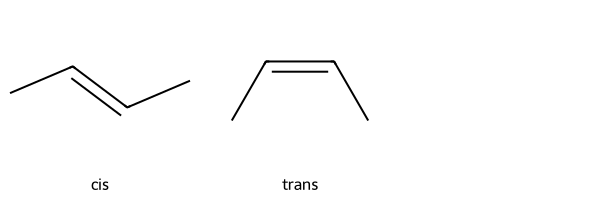

In [8]:
cis_butene = Chem.MolFromSmiles("C/C=C/C")  # cis
trans_butene = Chem.MolFromSmiles("C/C=C\\C")  # trans

Draw.MolsToGridImage([cis_butene, trans_butene], legends=["cis", "trans"])

### Aromaticity in SMILES
Aromatic atoms are written in lowercase (e.g., `c`, `n`) in SMILES. This applies to aromatic systems like benzene and pyridine.

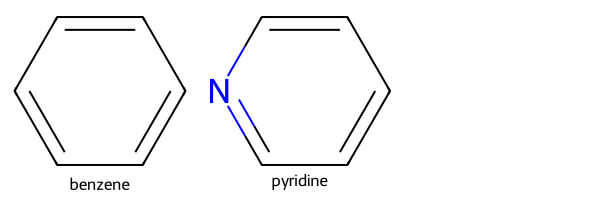

In [9]:
benzene = Chem.MolFromSmiles("c1ccccc1")
pyridine = Chem.MolFromSmiles("c1ccncc1")
Draw.MolsToGridImage([benzene, pyridine], legends=["benzene", "pyridine"])

# 2. Reaction SMILES

Rules:
- Molecules must be **valid SMILES strings**.
- Sections must be **in order**: `reactants > agents > products`.
- Leave the agent section blank (`>>`) if you’re not specifying reagents.
- Use **dot `.` separators** to list multiple molecules in a section.

reactant1.reactant2 > agent1.agent2 > product1.product2

Consider the Esterification reaction of ethanol and acetic acid to form ethyl acetate
- ethanol `CCO`
- acetic acid `CC(=O)O`
- ethyle acetate `CCOC(=O)C`

  The Reaction SMILES

`CCO.CC(=O)O>>CCOC(=O)C`

In [10]:
reaction_smiles = "CCO.CC(=O)O>>CCOC(=O)C"
print(reaction_smiles)

CCO.CC(=O)O>>CCOC(=O)C


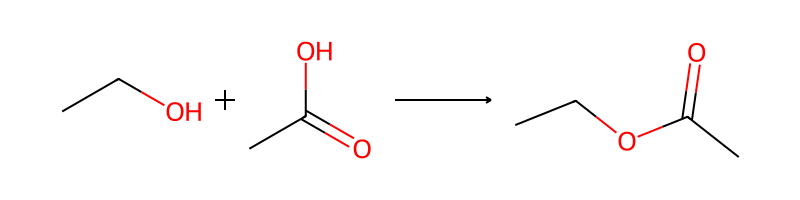

In [11]:
## RDKit and Reaction SMILES
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw\

reaction_smiles = "CCO.CC(=O)O>>CCOC(=O)C"
rxn = AllChem.ReactionFromSmarts(reaction_smiles, useSmiles=True)
Draw.ReactionToImage(rxn)

### Pasting Reaction Smiles to molecular Editor
1. Copy Reaction Smiles to clipboard
2. Open an Editor like [Ketcher Demo](https://lifescience.opensource.epam.com/ketcher/demo.html)
3. Paste
4. Edit
5. Save (Choose Daylight SMILES)


# 3. SMARTS (SMiles ARbitrary Target Specification)
**SMARTS** is a language for describing **substructural patterns** in molecules. It’s an extension of SMILES, but instead of representing whole molecules, SMARTS is used to find parts of molecules, like functional groups, rings, or atomic arrangements via pattern matching.

When to use SMARTS in RDKit?
- Substructure matching (`mol.HasSubstructMatch()`)
- Functional group searches
- Filtering chemical libraries
- Defining reaction centers
- Atom mapping (especially if `MolFromSmiles()` fails due to mapping issues)


##  SMILES vs. SMARTS

While SMILES is great for:
- Storing molecules
- Transferring structures
- Reconstructing full molecular graphs

SMARTS was invented to solve pattern matching problems in cheminformatics — to allow:
- Substructure searches
- Functional group recognition
- Chemical rule encoding (e.g., pharmacophores, toxicity rules)

| Feature            | SMILES                        | SMARTS                          |
|--------------------|-------------------------------|----------------------------------|
| Whole molecule?    |  Yes                        |  Not always (can be partial)   |
| Substructure query |  No                         |  Yes                           |
| Atom wildcards     |  No                         |  Yes (`*`, `#6`, `[O;H1]`)     |
| Bond logic         |  No                         |  Yes (`-`, `=`, `~`, `!`, etc.)|
| Use in RDKit       | `MolFromSmiles()`             | `MolFromSmarts()`               |

---
**Example: Acetic Acid**
- SMILES `CC(=O)O` describes a specific molecule
- SMARTS '[CX3](=O)[OX1H]` - a carbon atom with 3 neighbors, double bonded to oxygen and single bonded to an OH

## Common SMARTS Patterns

| SMARTS Pattern       | Meaning                                | Example Match                    |
|----------------------|-----------------------------------------|----------------------------------|
| `*`                  | Any atom                               | Matches all atoms                |
| `#6`                 | Carbon (atomic number 6)               | Matches any carbon atom          |
| `C`                  | Aliphatic carbon                       | Matches non-aromatic C           |
| `c`                  | Aromatic carbon                        | Matches benzene ring carbon      |
| `N`                  | Aliphatic nitrogen                     | Matches amines, etc.             |
| `n`                  | Aromatic nitrogen                     | Matches pyridine-type N          |
| `[O;H1]`             | Hydroxyl oxygen                        | Matches -OH group                |
| `[CX3]=O`            | Carbon (sp2) double bonded to O        | Carbonyl group                   |
| `[OX1H]`             | Single-bonded OH group                 | Alcohol or acid OH               |
| `[$([NH2]),$([NH])`  | Primary or secondary amine             | Amine groups                     |
| `[!#6]`              | Any atom except carbon                 | e.g., O, N, S, etc.              |
| `[C;H3]`             | Methyl carbon                          | Terminal CH₃ group               |
| `[R]`                | Any atom in a ring                     | Benzene, cyclohexane atoms       |
| `[R0]`               | Atom not in a ring                     | Linear chain atoms               |
| `[cH]`               | Aromatic hydrogen                      | e.g., hydrogen on benzene ring   |
| `C(=O)O`             | Carboxylic acid group (non-generic)    | Acetic acid                      |
| `[C@H](N)(C)`        | Chiral carbon (with wedge notation)    | Specific stereochemistry         |



Hydroxyl group found!


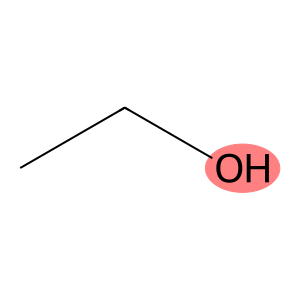

In [12]:
from rdkit import Chem
from rdkit.Chem import Draw

# Molecule: ethanol
mol = Chem.MolFromSmiles("CCO")

# SMARTS for hydroxyl group (oxygen with one hydrogen)
#hydroxyl_smarts = Chem.MolFromSmarts("[OX1H]")
hydroxyl_smarts = Chem.MolFromSmarts("[OX2H]")


# Check for match
if mol.HasSubstructMatch(hydroxyl_smarts):
    print("Hydroxyl group found!")
else:
    print("No hydroxyl group found.")

# Show the molecule with match atoms highlighted
matches = mol.GetSubstructMatches(hydroxyl_smarts)
Draw.MolToImage(mol, highlightAtoms=[atom for match in matches for atom in match])

### .HasSubstructMatch()

Carbonyl match atoms: ((1, 2),)


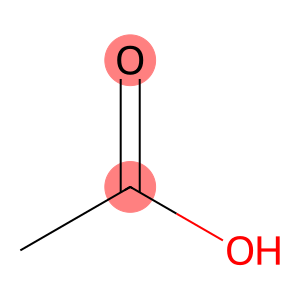

In [13]:
# Molecule: acetic acid
mol2 = Chem.MolFromSmiles("CC(=O)O")

# SMARTS for carbonyl group
carbonyl_smarts = Chem.MolFromSmarts("[CX3]=O")

# Check for match
print("Carbonyl match atoms:", mol2.GetSubstructMatches(carbonyl_smarts))
Draw.MolToImage(mol2, highlightAtoms=[atom for match in mol2.GetSubstructMatches(carbonyl_smarts) for atom in match])

Aromatic nitrogen found.


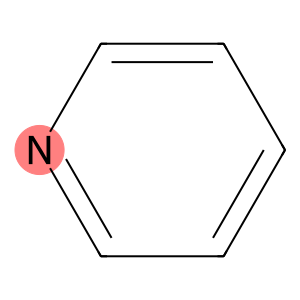

In [14]:
mol3 = Chem.MolFromSmiles("c1ccncc1")

# SMARTS for aromatic nitrogen
aromatic_n = Chem.MolFromSmarts("n")

if mol3.HasSubstructMatch(aromatic_n):
    print("Aromatic nitrogen found.")
Draw.MolToImage(mol3, highlightAtoms=mol3.GetSubstructMatches(aromatic_n)[0])

# 4. Reaction SMARTS
Reaction SMARTS is like writing a reaction mechanism as a pattern. It shows how atoms change — and uses atom mapping to track them between reactants and products.

| Feature             | **SMARTS**                           | **Reaction SMARTS**                      |
|---------------------|---------------------------------------|------------------------------------------|
| Purpose             | Describe **substructure patterns**    | Describe **reaction rules**              |
| Use Case            | Searching/filtering molecules         | Defining how molecules **transform**     |
| Format              | Single pattern                        | `Reactant SMARTS >> Product SMARTS`      |
| Example             | `[CX3]=O` = carbonyl group            | `[C:1](=O)[O:2]>>[C:1](=O)[O-:2]`         |
| Supported by RDKit  | `MolFromSmarts()`                     | `AllChem.ReactionFromSmarts()`           |

## Deprotonation of Carboxylic Acid

Reaction SMARTS
$$[O:1][H]>>[O-:1]
$$
- `[O:1][H]` — a hydroxyl group with atom `:1` tagged.
- `>>` — reaction arrow.
- `[O-:1]` — shows that oxygen becomes negatively charged.

- Load to RDKit
```python
from rdkit.Chem import AllChem
rxn = AllChem.ReactionFromSmarts("[O:1][H]>>[O-:1]")
```
- Apply to molecule to get product
- 
```python
mol = Chem.MolFromSmiles("CC(=O)O")  # acetic acid
products = rxn.RunReactants((mol,))

for prod in products:
    Draw.MolToImage(prod[0])
```


✅ Reaction ran successfully!


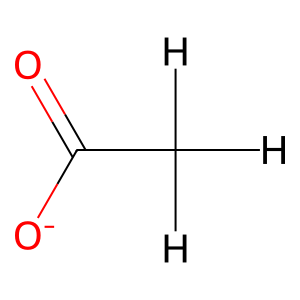

In [15]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

# Reaction SMARTS for deprotonation of a carboxylic acid
rxn_smarts = "[C:1](=O)[O:2][H]>>[C:1](=O)[O-:2]"
rxn = AllChem.ReactionFromSmarts(rxn_smarts)

# Acetic acid with explicit hydrogens
reactant = Chem.AddHs(Chem.MolFromSmiles("CC(=O)O"))

# Run the reaction
products = rxn.RunReactants((reactant,))

# Safely display results
if products:
    print("✅ Reaction ran successfully!")
    display(Draw.MolToImage(products[0][0]))
else:
    print("⚠️ No products generated — check atom mapping and hydrogens.")




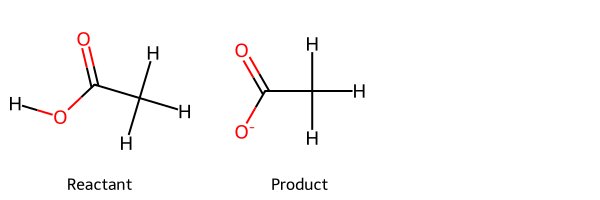

In [16]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

# 1. Define the reaction SMARTS with atom mapping
rxn_smarts = "[C:1](=O)[O:2][H]>>[C:1](=O)[O-:2]"
rxn = AllChem.ReactionFromSmarts(rxn_smarts)

# 2. Create the reactant (acetic acid) with **explicit hydrogens**
reactant = Chem.AddHs(Chem.MolFromSmiles("CC(=O)O"))

# 3. Run the reaction
products = rxn.RunReactants((reactant,))

# 4. If reaction succeeds, show both molecules side by side with atom mapping highlights
if products:
    product = products[0][0]  # First product set, first product molecule

    # 5. Get atom mappings from both molecules
    def get_mapped_atoms(mol):
        return [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetAtomMapNum() > 0]

    reactant_mapped_atoms = get_mapped_atoms(reactant)
    product_mapped_atoms = get_mapped_atoms(product)

    # 6. Draw both side-by-side
    img = Draw.MolsToGridImage(
        [reactant, product],
        legends=["Reactant", "Product"],
        highlightAtomLists=[reactant_mapped_atoms, product_mapped_atoms]
    )
    display(img)
else:
    print("⚠️ Reaction did not run. Check SMARTS and reactants.")


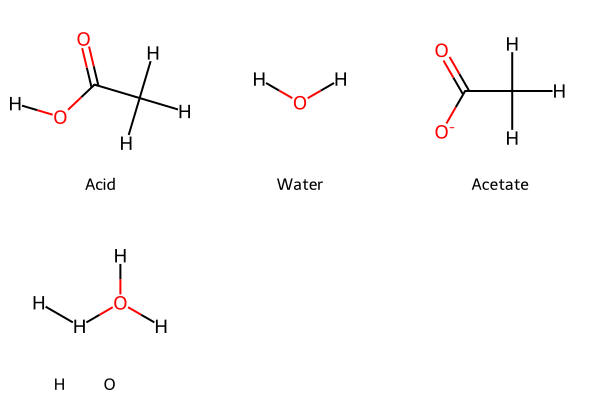

🔁 Reaction SMILES:
[H]OC(=O)C([H])([H])[H].[H]O[H]>>[H]C([H])([H])C(=O)[O-].[H][H]O([H])[H]


In [17]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

# 1. Define Reaction SMARTS for proton transfer
# Carboxylic acid donates proton to water
rxn_smarts = "[C:1](=O)[O:2][H].[O:3]>>[C:1](=O)[O-:2].[O:3][H][H]"
rxn = AllChem.ReactionFromSmarts(rxn_smarts)

# 2. Reactants: Acetic acid + water (with explicit Hs)
acid = Chem.AddHs(Chem.MolFromSmiles("CC(=O)O"))
water = Chem.AddHs(Chem.MolFromSmiles("O"))

# 3. Run the reaction
products = rxn.RunReactants((acid, water))

if products:
    product1, product2 = products[0]  # First product set

    # 4. Show reactants and products side by side
    img = Draw.MolsToGridImage(
        [acid, water, product1, product2],
        legends=["Acid", "Water", "Acetate", "H₃O⁺"]
    )
    display(img)

    # 5. Generate SMILES for reaction: reactants >> products
    reactant_smiles = ".".join([Chem.MolToSmiles(mol) for mol in (acid, water)])
    product_smiles = ".".join([Chem.MolToSmiles(mol) for mol in (product1, product2)])
    rxn_smiles = f"{reactant_smiles}>>{product_smiles}"

    print("🔁 Reaction SMILES:")
    print(rxn_smiles)
else:
    print("⚠️ No products generated.")


Product 1


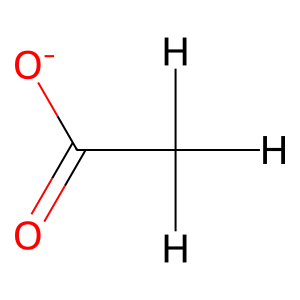

In [18]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from IPython.display import display

# Define the reaction
rxn = AllChem.ReactionFromSmarts("[O:1][H]>>[O-:1]")

# Reactant: acetic acid
mol = Chem.AddHs(Chem.MolFromSmiles("CC(=O)O"))

# Run the reaction
products = rxn.RunReactants((mol,))

# Display products
for i, prod in enumerate(products):
    print(f"Product {i+1}")
    display(Draw.MolToImage(prod[0]))


In [19]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

# Reaction SMARTS for deprotonation of a carboxylic acid
rxn_smarts = "[C:1](=O)[O:2][H]>>[C:1](=O)[O-:2]"
rxn = AllChem.ReactionFromSmarts(rxn_smarts)


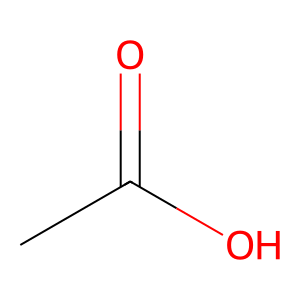

In [20]:
# Acetic acid (CH3COOH)
reactant = Chem.MolFromSmiles("CC(=O)O")
Draw.MolToImage(reactant)


In [21]:
# Run the reaction
products = rxn.RunReactants((reactant,))

# Show product(s)
Draw.MolToImage(products[0][0])


IndexError: tuple index out of range

In [ ]:
# Convert to SMILES
product_smiles = Chem.MolToSmiles(products[0][0])
print("Product SMILES:", product_smiles)

# Check atom mapping if needed
for atom in products[0][0].GetAtoms():
    print(f"Atom {atom.GetIdx()}: {atom.GetSymbol()}, map={atom.GetAtomMapNum()}")


In [ ]:
ethanol = Chem.MolFromSmiles("CCO")
acetic_acid = Chem.MolFromSmiles("CC(=O)O")
reactants = (ethanol, acetic_acid)
products = rxn.RunReactants(reactants)